# Actividad: Localización

Integrantes Equipo 4:
* Álvaro López
* Celinna Arellano
* Lolyna de la Fuente
* Luis Gabriel Martínez
* María del Carmen Vargas

## Problematización

Para esta actividad nos encontramos con la problemática de un robot que no sabe el lugar en el que se encuentra, por lo que trata de descifrar su ubicación según un conjunto de observaciones. El robot está equipado con cuatro sensores que nos indican si hay un obstáculo o no en una dirección específica, es decir, si se encuentra libre u ocupado un espacio (recuadro) dentro de la cuadrícula en la que se encuentra. Nuestro objetivo es calcular la ruta más probable según la probabilidad individual de cada movimiento que haga nuestro robot. 

## Enfoque

Para este caso se implementó el modelo oculto de Markov. Este modelo estadístico nos ayuda a calcular y predecir secuencias a futuro basándose en lo que se conoce en el presente y a probabilidades.

**Implementación del HMM**

1. Importamos las librerías necesarias.

2. Creación del tablero en que el robot va a estar recorriendo. Este tablero es aleatorio y contiene 1 y 0, siendo 1 lugar disponible y 0 lugar ocupado.


3. Consultamos cuántos lugares libres se tienen en todo el tablero y después hacer una búsqueda de todos los vecinos  de estos lugares libres, de los cuales se almacena la coordenada del origen de los vecinos, las posiciones de los vecinos y los valores de estos.


4. Para poder implementar las funciones de las cuatro inferencias, necesitamos establecer y crear varios componentes necesarios como el modelo inicial, el modelo de transición, el modelo del sensor, las posibles evidencias, los posibles estados y el factor de error de los sensores del modelo. 


5. Posteriormente, definimos las funciones de las cuatro inferencias básicas que podemos realizar dado que nuestro modelo lo definimos como genérico temporal: filtrado, predicción, smoothing y explicación más probable (‘most likely sequence’).


6. Cuando ya se tienen estos componentes, se llama a las funciones previamente establecidas para poder llegar a la mejor secuencia en la que el robot se moverá libremente.


7. Se obtienen los resultados y se visualiza su eficacia gracias a heatmaps.



## Propósito

El objetivo principal de este trabajo es implementar un modelo estadístico conocido como el Modelo Oculto de Márkov (HMM) dentro del contexto inicial en el que se debe inferir la posición de un robot dentro de un entorno estático. Existe una propiedad de Márkov muy importante, la cual dice que el futuro es independiente del pasado dado el presente, esto quiere decir que solo importa el estado actual para tomar una decisión. Sin embargo, la complejidad del caso en el que se encuentra la problemática es que no se conoce el estado actual del robot ni el estado de las posiciones posibles para moverse (información **oculta**). La manera de resolverlo es aplicando el Modelo Oculto de Márkov ya que resulta muy útil para calcular el **estado oculto más probable** dadas una secuencia de observaciones.


En otras palabras, con base en métodos probabilísticos, el Modelo Oculto de Márkov es eficaz para obtener el cálculo de tareas complejas entre ellas la localización y navegación de un robot, todo en relación de su posición y su orientación. 


## Información

Los Modelos Ocultos de Markov (HMM, por sus siglas en inglés) nos permite hablar de eventos observados  y eventos ocultos que, las cuáles se consideran como factores causales en nuestro modelo probabilístico. Estos modelos se basan en la utilización del concepto conocido como Cadenas de Markov (o también conocido como Procesos de Markov). Un proceso de Markov es un modelo estadístico basado en la probabilidad que se es utilizado para describir eventos (o más bien, una secuencia de eventos) donde la probabilidad de ocurrencia de cada uno de éstos es sujeto por sólo por el estado alcanzado en el evento anterior. 


El  proceso de Markov utiliza también lo que se conoce como el supuesto de Markov, donde se estipula que el estado actual $X_k$ es dependiente de una cantidad finita de estados anteriores.  La siguiente expresión es una forma de visualizar al supuesto de Markov.


\begin{equation}
    P(X_k | X_{0:k-1})= P(X_k | X_{k-1})
\end{equation}


Para el escrito presente, el modelo de Markov utiliza el concepto de tiempo discreto, en vez de la utilización del concepto de tiempo continuo. Otro concepto que se debe aclarar es aquél de la \textit{Transición}. Una transición, en el contexto de un modelo de Markov, es un cambio del estado en el sistema, cada una teniendo sus \textit{probabilidades de transición}. Un modelo de transición es aquél que da la distribución de probabilidad del estado actual $X_k$ dado lo que sabemos de los $X_{0:k−1}$ , ello siendo: 

\begin{equation}
    P(X_k | X_{0:k-1})
\end{equation}


## Razonamiento

In [ ]:
import numpy as np
from numpy.linalg import matrix_power
import seaborn as sns
import pandas as pd

In [ ]:
table = np.random.randint(2, size=(10, 10))
table

array([[1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 0, 1, 0]])

In [ ]:
n_free = np.unique(table, return_counts=True)[1][1]
n_free

44

In [ ]:
nei = []
nei_vals = []
nei_i = []

for row in range(len(table)):
  for col in range(len(table[row])):
    n = [] #Distribucion de los vecinos es N S E O
    n_vals = []
    #Checar norte
    if row == 0:
      n.append([-1, col])
      n_vals.append(0)
    else:
      n.append([row - 1,col])
      n_vals.append(table[row - 1][col])
    #Checar sur
    if row == (len(table) - 1):
      n.append([10, col])
      n_vals.append(0)
    else:
      n.append([row + 1, col])
      n_vals.append(table[row + 1][col])
    #Checar este
    if col == (len(table[row]) - 1):
      n.append([row, 10])
      n_vals.append(0)
    else:
      n.append([row, col + 1])
      n_vals.append(table[row][col + 1])
    #Checar oeste
    if col == 0:
      n.append([row, -1])
      n_vals.append(0)
    else:
      n.append([row, col - 1])
      n_vals.append(table[row][col - 1])

    nei.append(n)
    nei_vals.append(n_vals)
    nei_i.append([row,col])
nei_vals

[[0, 0, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0],
 [0, 0, 1, 1],
 [0, 1, 1, 0],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 0, 1],
 [1, 1, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 1],
 [1, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 0],
 [0, 1, 0, 1],
 [0, 1, 0, 0],
 [1, 1, 1, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 1],
 [0, 1, 0, 1],
 [1, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 1, 1, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 1],
 [1, 1, 1, 0],
 [0, 0, 1, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0],
 [1, 1, 0, 1],
 [1, 0, 0, 0],
 [1, 1, 1, 0],
 [1, 1, 0, 0],
 [0, 1, 1, 1],
 [1, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 0, 0],
 [1, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 1, 1],
 [0, 0, 0, 1],
 [1, 0, 0, 1],
 [0, 1, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 1, 0, 1],
 [1, 1, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 0, 1],
 [0, 1, 0,

In [ ]:
free_coords = []
for i,row in enumerate(table):
  for j,col in enumerate(row):
    if col == 1:
      free_coords.append([i,j])


### HMM


In [ ]:
error = 0.15

In [ ]:
T = np.zeros(shape = (n_free, n_free))
def is_neighbor(coord_1, coord_2):
  loc = nei_i.index(coord_1)
  if coord_2 in nei[loc]:
    return True
  else:
    return False

for i in range(n_free):
  for j in range(n_free):
    if is_neighbor(free_coords[i], free_coords[j]):
      T[i,j] = 1/nei_vals[nei_i.index(free_coords[i])].count(1)
    else:
      T[i,j] = 0
T

array([[0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [ ]:
def get_neighbors(coord):
  index = nei_i.index(coord)
  return nei_vals[index]

In [ ]:
O = {}
for i in range(16):
  state = [i % 2, (i // 2) % 2, (i // 4) % 2, (i // 8) % 2]
  observation = np.zeros(shape = [n_free, n_free])
  for j in range(n_free):
    discrepancy = np.sum(np.array([state]) == np.array([get_neighbors(free_coords[j])]))
    observation[j,j] = ((1-error)**(4-discrepancy))*(error**discrepancy)
  O[i] = observation

In [ ]:
S = {}

for i in range(n_free):
  S[i] = 'Neighbor ' + str(i)


In [ ]:
X0 = np.zeros(shape = [1,n_free])

In [ ]:
for i in range(n_free):
  X0[0,i] = 1/n_free
X0 = X0.reshape((n_free,1))

In [ ]:
def generar_evidencia_aleatoria(n):
  E = []
  for i in range(n):
    E.append(np.random.randint(2, size = [1,4]).tolist()[0])
  return E

In [ ]:
def filtering(E, O, T, X0):
    
    forward = X0
    
    for evidence in E:
        forward = O[evidence] @ T.T @ forward
        forward = forward / forward.sum()
        
    return forward

In [ ]:
def prediction(E, O, T, X0, k):
    
    prediction = np.linalg,matrix_power(T.T, k) @ filtering(E, O, T, X0)
    
    return prediction    

In [ ]:
def smoothing(E, O, T, X0, k):
    
    forward = filtering(E[:k], O, T, X0)
    
    backward = np.ones((T.shape[0],1))
    
    for evidence in E[-1:k-1:-1]:
        backward = T @ O[evidence] @ backward
    
    smooth = forward * backward
    smooth = smooth / smooth.sum()
    
    return smooth

In [ ]:
def most_likely_sequence(E, O, S, T, X0):
    
    sequences = np.zeros((T.shape[0], len(E)))
    states = np.zeros((T.shape[0], len(E)))
    ones = np.ones((T.shape[0], T.shape[0]))
    sequences[:, 0] = (O[E[0]] @ X0).reshape((T.shape[0],))
    message = sequences[:, 0].reshape((T.shape[0], 1))
    
    for i, evidence in enumerate(E[1:]):
        message = (T @ O[evidence]) * (message * ones)
        states[:, i+1] = np.argmax(message, axis=0).reshape((T.shape[0],))
        message = np.max(message, axis=0).reshape((T.shape[0], 1))
        sequences[:, i+1] = message.reshape((T.shape[0],))
        
    states = states.astype('int32')
    s = np.argmax(sequences[:, -1], axis=0)
    best_sequence = [S[s]]
    
    for i in range(len(E)-1, 0, -1):
        s = states[s, i]
        best_sequence.append(S[s])
        
    best_sequence = best_sequence[::-1] 
    
    return sequences, states, best_sequence        

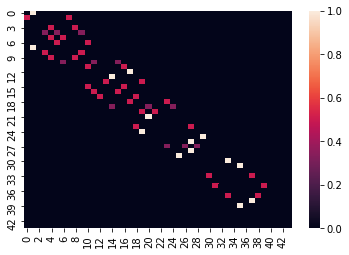

In [ ]:
ax = sns.heatmap(T)

In [ ]:
def definir_evidencia(E):
  Evidence = []
  for e in E:
    for i in range(16):
      state = [i % 2, (i // 2) % 2, (i // 4) % 2, (i // 8) % 2]
      if e == state:
        Evidence.append(i)
        break

  return Evidence

In [ ]:
evidence = generar_evidencia_aleatoria(4) 
E = definir_evidencia(evidence)

In [ ]:
evidence

[[1, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 1], [0, 1, 1, 0]]

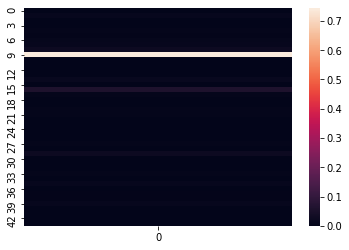

In [ ]:
#filtering(E, O, T, X0)
ax = sns.heatmap(filtering(E, O, T, X0))

La más probable posición del robot en el movimiento 4 es: [0, 5] 3


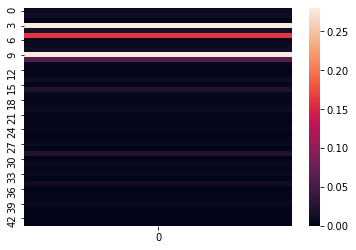

In [ ]:
mov_10 = prediction(E,O,T,X0,4)
ind = np.where(mov_10[1] == np.amax(mov_10[1]))
print('La más probable posición del robot en el movimiento 4 es:', free_coords[ind[0][0]], ind[0][0])
ax = sns.heatmap(mov_10[1])

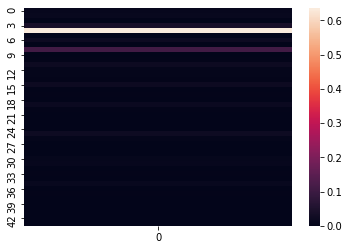

In [ ]:
ax = sns.heatmap(smoothing(E,O,T,X0,1))

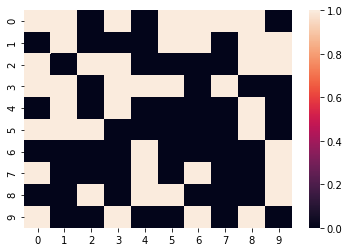

In [ ]:
ax = sns.heatmap(table)

In [ ]:
secuencias, estados, mejorSecuencia = most_likely_sequence(E,O,S,T,X0)
pd.DataFrame(mejorSecuencia)

,0
0,Neighbor 4
1,Neighbor 3
2,Neighbor 8
3,Neighbor 9


In [ ]:
print(free_coords[4])
print(free_coords[3])
print(free_coords[8])
print(free_coords[9])

[0, 6]
[0, 5]
[1, 5]
[1, 6]


## Conclusiones

Como se muestra en los resultados de nuestro código, obtuvimos la mejor secuencia en la que el robot se desplaza a cuatro lugares diferentes usando la función de inferencia de “most likely sequence”, tanto eso como las predicciones y los otros modelos dan certeza de que los resultados concuerdan. El poder plasmar en el mapa de calor tanto el mapa como los resultados nos ayudó a  concluir que es eficiente nuestro modelo, ya que evita los obstáculos establecidos satisfactoriamente y la ruta que se obtuvo es viable para poder asumir que el robot se encuentra por la zona predicha. Asimismo, gracias a que nuestro tablero y evidencias son aleatorias, esto demuestra que el robot puede adaptarse a cambios, objetivo principal de la cadena de Markov.